In [1]:
import pandas as pd

In [2]:
accre = pd.read_csv('accre-gpu-jobs-2022-v2.csv', error_bad_lines=False)

b'Skipping line 124084: expected 12 fields, saw 13\nSkipping line 124809: expected 12 fields, saw 13\n'


In [3]:
accre

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336945,46754520_26,harovin,porsha,0,5-00:00:00,00:07:07,1,6,1,turing,0:0,RUNNING
336946,46754542,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336947,46754560,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336948,46754598,glasshouse,treva,145.24M,1-00:00:00,00:01:26,1,5,1,turing,0:0,COMPLETED


In [4]:
accre.shape

(336950, 12)

In [5]:
accre['USEDTIME'].value_counts()

00:00:00      51083
00:00:07      19788
00:00:08      11147
00:00:09       6900
00:00:06       5785
              ...  
1-02:08:50        1
14:19:01          1
03:59:45          1
12:23:36          1
08:48:55          1
Name: USEDTIME, Length: 20818, dtype: int64

In [6]:
accre.dtypes

JOBID        object
ACCOUNT      object
USER         object
USEDMEM      object
REQTIME      object
USEDTIME     object
NODES         int64
CPUS          int64
GPUS          int64
PARTITION    object
EXITCODE     object
STATE        object
dtype: object

In [7]:
accre.USEDTIME = accre.USEDTIME.str.replace('-','days ',regex=True)

In [8]:
accre.head()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED


In [9]:
accre['USEDTIMEtd'] = pd.to_timedelta(accre['USEDTIME'])

In [10]:
accre.head()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,0 days 00:13:13
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,0 days 00:00:22
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,0 days 00:08:57
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,0 days 05:09:46
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,0 days 04:11:10


In [11]:
accre['USEDTIMEtd'].dt.total_seconds()

0           793.0
1            22.0
2           537.0
3         18586.0
4         15070.0
           ...   
336945      427.0
336946        0.0
336947        0.0
336948       86.0
336949        0.0
Name: USEDTIMEtd, Length: 336950, dtype: float64

In [12]:
accre['usedtime_seconds'] = accre['USEDTIMEtd'].dt.total_seconds()

In [13]:
accre.head()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,usedtime_seconds
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,0 days 00:13:13,793.0
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,0 days 00:00:22,22.0
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,0 days 00:08:57,537.0
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,0 days 05:09:46,18586.0
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,0 days 04:11:10,15070.0


In [14]:
accre.tail()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,usedtime_seconds
336945,46754520_26,harovin,porsha,0,5-00:00:00,00:07:07,1,6,1,turing,0:0,RUNNING,0 days 00:07:07,427.0
336946,46754542,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING,0 days 00:00:00,0.0
336947,46754560,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING,0 days 00:00:00,0.0
336948,46754598,glasshouse,treva,145.24M,1-00:00:00,00:01:26,1,5,1,turing,0:0,COMPLETED,0 days 00:01:26,86.0
336949,46754618,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING,0 days 00:00:00,0.0


In [15]:
accre_filtered = accre[accre['usedtime_seconds'] != 0.0]

In [16]:
accre_filtered = accre[accre['STATE'] == 'COMPLETED']

In [17]:
accre_filtered.shape

(283333, 14)

In [18]:
accre_filtered.tail()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,usedtime_seconds
336933,46753813,harovin,shannon,137.96M,5-00:00:00,00:00:52,1,1,1,turing,0:0,COMPLETED,0 days 00:00:52,52.0
336934,46753820_26,harovin,porsha,5093.70M,5-00:00:00,00:34:51,1,6,1,turing,0:0,COMPLETED,0 days 00:34:51,2091.0
336936,46753823,harovin,shannon,156.21M,5-00:00:00,00:04:03,1,1,1,turing,0:0,COMPLETED,0 days 00:04:03,243.0
336942,46754095,harovin,shannon,2820.52M,5-00:00:00,00:11:13,1,1,1,turing,0:0,COMPLETED,0 days 00:11:13,673.0
336948,46754598,glasshouse,treva,145.24M,1-00:00:00,00:01:26,1,5,1,turing,0:0,COMPLETED,0 days 00:01:26,86.0


In [19]:
accre_filtered.USEDMEM= accre_filtered.USEDMEM.str.replace('M','',regex=True)

C:\Users\17202\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
accre_filtered.head()


,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,usedtime_seconds
0,32880657,malanga,arline,18.66,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,0 days 00:13:13,793.0
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,0 days 00:00:22,22.0
2,32880718,glasshouse,brady,402.32,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,0 days 00:08:57,537.0
3,32880719,glasshouse,brady,417.62,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,0 days 05:09:46,18586.0
4,32880720,glasshouse,brady,450.09,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,0 days 04:11:10,15070.0


In [21]:
accre_filtered.dtypes

JOBID                        object
ACCOUNT                      object
USER                         object
USEDMEM                      object
REQTIME                      object
USEDTIME                     object
NODES                         int64
CPUS                          int64
GPUS                          int64
PARTITION                    object
EXITCODE                     object
STATE                        object
USEDTIMEtd          timedelta64[ns]
usedtime_seconds            float64
dtype: object

In [22]:
accre_filtered.USEDMEM = accre_filtered['USEDMEM'].str.strip()

C:\Users\17202\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [23]:
accre_filtered = accre_filtered.astype({"USEDMEM":'float'})

In [24]:
#df4_SC['weighted_memorry'] = (df4_SC['MEM']/df4_SC['GPUS'])*df4_SC['USED_SEC']

In [25]:
#per gpu usage = memory/gpu
#runtime weighted = gpu * seconds used
#memory * seconds

In [26]:
accre_filtered['memory_per_gpu'] = accre_filtered['USEDMEM']/accre_filtered['GPUS']

In [27]:
accre_filtered['weight'] = accre_filtered['GPUS'] * accre_filtered['usedtime_seconds'] 

In [28]:
accre_filtered['weighted_memory_gpu'] = accre_filtered['memory_per_gpu'] * accre_filtered['weight']

In [29]:
accre_filtered.head(5)

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,usedtime_seconds,memory_per_gpu,weight,weighted_memory_gpu
0,32880657,malanga,arline,18.66,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,0 days 00:13:13,793.0,18.66,793.0,14797.38
1,32880701,glasshouse,brady,0.00,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,0 days 00:00:22,22.0,0.00,22.0,0.00
2,32880718,glasshouse,brady,402.32,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,0 days 00:08:57,537.0,402.32,537.0,216045.84
3,32880719,glasshouse,brady,417.62,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,0 days 05:09:46,18586.0,417.62,18586.0,7761885.32
4,32880720,glasshouse,brady,450.09,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,0 days 04:11:10,15070.0,450.09,15070.0,6782856.30


In [30]:
accre_filtered = accre_filtered[accre_filtered['memory_per_gpu'] != 0.0]

In [31]:
accre_filtered = accre_filtered.sort_values(['PARTITION', 'memory_per_gpu'])

In [32]:
accre_filtered.head()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,usedtime_seconds,memory_per_gpu,weight,weighted_memory_gpu
57704,35317072,clara,suzanna,0.01,4-23:59:00,5days 00:00:04,1,3,1,maxwell,0:0,COMPLETED,5 days 00:00:04,432004.0,0.0100,432004.0,4320.04
81792,40850031,glasshouse,mel,0.84,5-00:00:00,00:00:20,3,33,16,maxwell,0:0,COMPLETED,0 days 00:00:20,20.0,0.0525,320.0,16.80
81793,40850186,glasshouse,mel,0.84,5-00:00:00,00:00:21,3,33,16,maxwell,0:0,COMPLETED,0 days 00:00:21,21.0,0.0525,336.0,17.64
81794,40850269,glasshouse,mel,0.84,5-00:00:00,00:00:20,3,33,16,maxwell,0:0,COMPLETED,0 days 00:00:20,20.0,0.0525,320.0,16.80
81795,40850643,glasshouse,mel,0.84,5-00:00:00,00:00:21,3,33,16,maxwell,0:0,COMPLETED,0 days 00:00:21,21.0,0.0525,336.0,17.64


In [33]:
accre_filtered['cumulative_weight'] = accre_filtered.groupby('PARTITION')['weight'].cumsum()

In [34]:
accre_filtered.groupby('PARTITION')['weight'].transform('sum')

57704     331264074.0
81792     331264074.0
81793     331264074.0
81794     331264074.0
81795     331264074.0
             ...     
114682    733909501.0
114661    733909501.0
59980     733909501.0
114656    733909501.0
335056    733909501.0
Name: weight, Length: 277475, dtype: float64

In [35]:
accre_filtered['cumulative_percentage'] = accre_filtered['cumulative_weight']/accre_filtered.groupby('PARTITION')['weight'].transform('sum')

In [36]:
percentile = 0.50

accre_filtered.loc[accre_filtered['cumulative_percentage'] >= percentile].groupby('PARTITION').head(1)

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,usedtime_seconds,memory_per_gpu,weight,weighted_memory_gpu,cumulative_weight,cumulative_percentage
57748,35360906,glasshouse,collier,4277.56,3-08:00:00,1days 17:21:58,2,2,12,maxwell,0:0,COMPLETED,1 days 17:21:58,148918.0,356.463333,1787016.0,6.370057e+08,166509465.0,0.502649
59458,35874261,glasshouse,birdella,427.05,5-00:00:00,2days 12:25:00,1,1,1,pascal,0:0,COMPLETED,2 days 12:25:00,217500.0,427.050000,217500.0,9.288338e+07,600884119.0,0.500142
134561,43955704_9,harovin,porsha,3915.08,5-00:00:00,10:01:59,1,6,1,turing,0:0,COMPLETED,0 days 10:01:59,36119.0,3915.080000,36119.0,1.414088e+08,366975218.0,0.500028


In [78]:
import seaborn as sns

<AxesSubplot:xlabel='cumulative_percentage', ylabel='memory_per_gpu'>

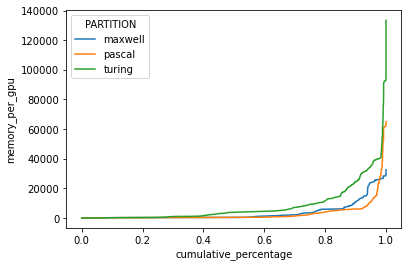

In [79]:
sns.lineplot(data = accre_filtered, x='cumulative_percentage', y= 'memory_per_gpu', hue='PARTITION')

<AxesSubplot:xlabel='cumulative_percentage', ylabel='memory_per_gpu'>

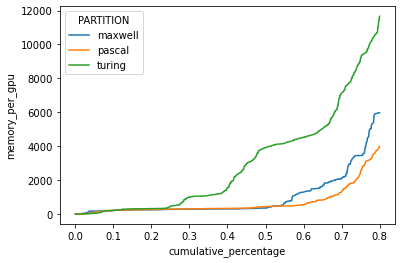

In [81]:
sns.lineplot(data = accre_filtered[accre_filtered['cumulative_percentage'] <= 0.8], x='cumulative_percentage', y= 'memory_per_gpu', hue='PARTITION')

In [37]:
percentile = 0.10

accre10 = accre_filtered.loc[accre_filtered['cumulative_percentage'] >= percentile].groupby('PARTITION').head(1)
accre10

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,usedtime_seconds,memory_per_gpu,weight,weighted_memory_gpu,cumulative_weight,cumulative_percentage
187541,44427364,orange,davonta,817.33,4-00:00:00,3days 17:21:02,1,12,4,maxwell,0:0,COMPLETED,3 days 17:21:02,321662.0,204.3325,1286648.0,2.629040e+08,33299996.0,0.100524
334422,46512881,sunburst,demarcus,419.10,4-00:00:00,2days 10:35:37,1,2,2,pascal,0:0,COMPLETED,2 days 10:35:37,210937.0,209.5500,421874.0,8.840370e+07,120472825.0,0.100275
58486,35796122,virginia,almond,840.35,2-00:00:00,2days 00:00:18,1,24,4,turing,0:0,COMPLETED,2 days 00:00:18,172818.0,210.0875,691272.0,1.452276e+08,73896494.0,0.100689


In [47]:
accre_decile = pd.concat([accre10,accre20,accre30,accre40,accre50,accre60,accre70,accre80,accre90,accre100], axis=0)
accre_decile.head(5)

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,usedtime_seconds,memory_per_gpu,weight,weighted_memory_gpu,cumulative_weight,cumulative_percentage
187541,44427364,orange,davonta,817.33,4-00:00:00,3days 17:21:02,1,12,4,maxwell,0:0,COMPLETED,3 days 17:21:02,321662.0,204.3325,1286648.0,2.629040e+08,33299996.0,0.100524
334422,46512881,sunburst,demarcus,419.10,4-00:00:00,2days 10:35:37,1,2,2,pascal,0:0,COMPLETED,2 days 10:35:37,210937.0,209.5500,421874.0,8.840370e+07,120472825.0,0.100275
58486,35796122,virginia,almond,840.35,2-00:00:00,2days 00:00:18,1,24,4,turing,0:0,COMPLETED,2 days 00:00:18,172818.0,210.0875,691272.0,1.452276e+08,73896494.0,0.100689
325891,45523591,glasshouse,erick,251.55,04:00:00,02:08:25,1,1,1,maxwell,0:0,COMPLETED,0 days 02:08:25,7705.0,251.5500,7705.0,1.938193e+06,66259918.0,0.200021
316948,45320326,glasshouse,erick,263.09,4-04:00:00,4days 01:25:31,1,1,1,pascal,0:0,COMPLETED,4 days 01:25:31,350731.0,263.0900,350731.0,9.227382e+07,240613913.0,0.200273


In [66]:
import seaborn as sns

In [48]:
# what is total runtime of jobs using x (1,2,3,etc) gpus per partition. groupby. out of total runtime on partition, what is % of time used by gpu. x number of seconds on 1 gpu....

In [49]:
total_time_partition = accre_filtered.groupby('PARTITION')['usedtime_seconds'].sum()
total_time_partition

PARTITION
maxwell    220662001.0
pascal     827347381.0
turing     546872782.0
Name: usedtime_seconds, dtype: float64

In [50]:
total_time_gpu = accre_filtered.groupby(['PARTITION', 'GPUS'])['usedtime_seconds'].sum()
total_time_gpu

PARTITION  GPUS
maxwell    1       193112958.0
           2         1173864.0
           3          162730.0
           4        21658370.0
           6          764727.0
           8          818384.0
           12        2570745.0
           16         349680.0
           18          18436.0
           24          32104.0
           40              3.0
pascal     1       715704548.0
           2        33523802.0
           3          820803.0
           4        65926538.0
           8         4718006.0
           12          16315.0
           16        5671219.0
           24         886127.0
           32          80018.0
           60              5.0
turing     1       477885316.0
           2        17286806.0
           3         3374519.0
           4        44319772.0
           8         3757347.0
           12             66.0
           16         248745.0
           40            211.0
Name: usedtime_seconds, dtype: float64

In [51]:
type(total_time_gpu)

pandas.core.series.Series

In [52]:
question2 = total_time_gpu.to_frame()
question2

usedtime_seconds
PARTITION GPUS                  
maxwell   1          193112958.0
          2            1173864.0
          3             162730.0
          4           21658370.0
          6             764727.0
          8             818384.0
          12           2570745.0
          16            349680.0
          18             18436.0
          24             32104.0
          40                 3.0
pascal    1          715704548.0
          2           33523802.0
          3             820803.0
          4           65926538.0
          8            4718006.0
          12             16315.0
          16           5671219.0
          24            886127.0
          32             80018.0
          60                 5.0
turing    1          477885316.0
          2           17286806.0
          3            3374519.0
          4           44319772.0
          8            3757347.0
          12                66.0
          16            248745.0
          40               211.0

In [53]:
question2.groupby('PARTITION')['usedtime_seconds'].sum()

PARTITION
maxwell    220662001.0
pascal     827347381.0
turing     546872782.0
Name: usedtime_seconds, dtype: float64

In [54]:
question2.reset_index()

,PARTITION,GPUS,usedtime_seconds
0,maxwell,1,193112958.0
1,maxwell,2,1173864.0
2,maxwell,3,162730.0
3,maxwell,4,21658370.0
4,maxwell,6,764727.0
5,maxwell,8,818384.0
6,maxwell,12,2570745.0
7,maxwell,16,349680.0
8,maxwell,18,18436.0
9,maxwell,24,32104.0


In [55]:
question2['total_partition_time'] = question2.groupby('PARTITION')['usedtime_seconds'].transform('sum')
question2

usedtime_seconds  total_partition_time
PARTITION GPUS                                        
maxwell   1          193112958.0           220662001.0
          2            1173864.0           220662001.0
          3             162730.0           220662001.0
          4           21658370.0           220662001.0
          6             764727.0           220662001.0
          8             818384.0           220662001.0
          12           2570745.0           220662001.0
          16            349680.0           220662001.0
          18             18436.0           220662001.0
          24             32104.0           220662001.0
          40                 3.0           220662001.0
pascal    1          715704548.0           827347381.0
          2           33523802.0           827347381.0
          3             820803.0           827347381.0
          4           65926538.0           827347381.0
          8            4718006.0           827347381.0
          12             16315.0           827347381.0
          16           5671219.0           827347381.0
          24            886127.0           827347381.0
          32             80018.0           827347381.0
          60                 5.0           827347381.0
turing    1          477885316.0           546872782.0
          2           17286806.0           546872782.0
          3            3374519.0           546872782.0
          4           44319772.0           546872782.0
          8            3757347.0           546872782.0
          12                66.0           546872782.0
          16            248745.0           546872782.0
          40               211.0           546872782.0

In [56]:
question2.reset_index()

,PARTITION,GPUS,usedtime_seconds,total_partition_time
0,maxwell,1,193112958.0,220662001.0
1,maxwell,2,1173864.0,220662001.0
2,maxwell,3,162730.0,220662001.0
3,maxwell,4,21658370.0,220662001.0
4,maxwell,6,764727.0,220662001.0
5,maxwell,8,818384.0,220662001.0
6,maxwell,12,2570745.0,220662001.0
7,maxwell,16,349680.0,220662001.0
8,maxwell,18,18436.0,220662001.0
9,maxwell,24,32104.0,220662001.0


In [57]:
question2['gpu_time%_bypartition'] = question2['usedtime_seconds']/question2['total_partition_time']
question2

usedtime_seconds  total_partition_time  gpu_time%_bypartition
PARTITION GPUS                                                               
maxwell   1          193112958.0           220662001.0           8.751528e-01
          2            1173864.0           220662001.0           5.319738e-03
          3             162730.0           220662001.0           7.374627e-04
          4           21658370.0           220662001.0           9.815179e-02
          6             764727.0           220662001.0           3.465603e-03
          8             818384.0           220662001.0           3.708767e-03
          12           2570745.0           220662001.0           1.165015e-02
          16            349680.0           220662001.0           1.584686e-03
          18             18436.0           220662001.0           8.354859e-05
          24             32104.0           220662001.0           1.454895e-04
          40                 3.0           220662001.0           1.359545e-08
pascal    1          715704548.0           827347381.0           8.650593e-01
          2           33523802.0           827347381.0           4.051962e-02
          3             820803.0           827347381.0           9.920899e-04
          4           65926538.0           827347381.0           7.968423e-02
          8            4718006.0           827347381.0           5.702570e-03
          12             16315.0           827347381.0           1.971965e-05
          16           5671219.0           827347381.0           6.854701e-03
          24            886127.0           827347381.0           1.071046e-03
          32             80018.0           827347381.0           9.671633e-05
          60                 5.0           827347381.0           6.043411e-09
turing    1          477885316.0           546872782.0           8.738510e-01
          2           17286806.0           546872782.0           3.161029e-02
          3            3374519.0           546872782.0           6.170574e-03
          4           44319772.0           546872782.0           8.104220e-02
          8            3757347.0           546872782.0           6.870605e-03
          12                66.0           546872782.0           1.206862e-07
          16            248745.0           546872782.0           4.548498e-04
          40               211.0           546872782.0           3.858301e-07

In [58]:
question2.reset_index()

,PARTITION,GPUS,usedtime_seconds,total_partition_time,gpu_time%_bypartition
0,maxwell,1,193112958.0,220662001.0,8.751528e-01
1,maxwell,2,1173864.0,220662001.0,5.319738e-03
2,maxwell,3,162730.0,220662001.0,7.374627e-04
3,maxwell,4,21658370.0,220662001.0,9.815179e-02
4,maxwell,6,764727.0,220662001.0,3.465603e-03
5,maxwell,8,818384.0,220662001.0,3.708767e-03
6,maxwell,12,2570745.0,220662001.0,1.165015e-02
7,maxwell,16,349680.0,220662001.0,1.584686e-03
8,maxwell,18,18436.0,220662001.0,8.354859e-05
9,maxwell,24,32104.0,220662001.0,1.454895e-04


In [86]:
question2 = question2.reset_index()

<AxesSubplot:xlabel='GPUS', ylabel='gpu_time%_bypartition'>

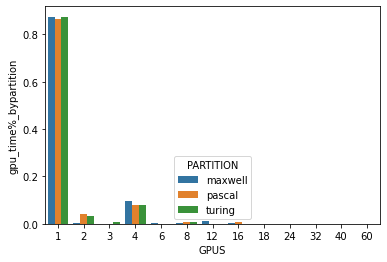

In [88]:
sns.barplot(data = question2, x='GPUS', y= 'gpu_time%_bypartition', hue= 'PARTITION')

In [59]:
question2.dtypes

usedtime_seconds         float64
total_partition_time     float64
gpu_time%_bypartition    float64
dtype: object

In [60]:
greater_than_4GPUS = question2.groupby('PARTITION')['GPUS'] > 4
greater_than_4GPUS.to_frame()
greater_than_4GPUS

KeyError: 'Column not found: GPUS'

In [ ]:
#w = accre_filtered.groupby(['PARTITION'])['runtime_weighted_pergpu_memory_usage'].agg(sum)
#w
#w.plot(kind = 'bar', x = 'Partition', ylabel = 'Total Weighted Memory')

In [ ]:
#g = accre_filtered.groupby(['PARTITION'])['weighted_gpus'].agg(sum)
#g
#g.plot(kind = 'bar', x = 'Partition', ylabel = 'Weighted GPUs')

In [ ]:
#t = accre_filtered.groupby(['PARTITION'])['usedtime_seconds'].agg('sum')
#t
#t.plot(kind='bar',  ylabel = 'Seconds * 10^9', title = 'Total Used Seconds per Partition');

In [ ]:
#wtp = w/total_time_per_partition
#wtp
#wtp.plot(kind='bar',  ylabel = 'MEM_used/USED_SEC', title = 'Total weighted-memmory/total_used sec per partition');

In [ ]:
# 4) What is the distribution of different groups and users accessing each partition? In each partition, who are the top users, and do they represent a majority of the runtime-weighted jobs on the partition?

In [ ]:
#accre_filtered.groupby(['PARTITION', 'ACCOUNT'])['USER'].value_counts().nlargest()

In [ ]:
# 5) Currently there is a 5 day limit on runtime for GPU jobs, although some users have been asking for extensions. What is the distribution of requested runtime and actual runtime on jobs on each partition? Do users really need more time, or are they simply always requesting the maximum?

In [ ]:
3accre_filtered.REQTIME = accre_filtered.REQTIME.str.replace('-','days ',regex=True)
#accre_filtered['REQTIMEtd'] = pd.to_timedelta(accre_filtered['REQTIME'])
#accre_filtered['reqtime_seconds'] = accre_filtered['REQTIMEtd'].dt.total_seconds()
#accre_filtered.head()

In [ ]:
#accre_filtered.groupby(['PARTITION'])['reqtime_seconds', 'usedtime_seconds'].mean()

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt

In [ ]:
#plt.figure(figsize = (12,5))
#sns.scatterplot(data = accre_filtered, x = 'reqtime_seconds', y = 'usedtime_seconds',
#hue = 'PARTITION', palette = 'colorblind', edgecolor = 'black')
#plt.title('Requested Time vs. Used Time')
#plt.grid(True)
#plt.legend(bbox_to_anchor =(1.0, 1.0));

In [ ]:
#sns.displot(accre_filtered, x="flipper_length_mm", binwidth=3)